In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1) 데이터 불러오기
digits = datasets.load_digits()
X_img = digits.images.astype("float32")  # (n, 8, 8)
y = digits.target.astype("int64")

In [17]:
# 2) 전처리: [0,1]로 정규화 + 채널 차원 추가
X_img /= 16.0                    # 원래 픽셀 범위가 0~16
X_img = X_img[..., np.newaxis]   # (n, 8, 8, 1)

In [18]:
# 3) 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_img, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
# 4) 모델 정의 (작은 CNN)
model = keras.Sequential([
    layers.Input(shape=(8, 8, 1)),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),                 # 8x8 -> 4x4
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # one-hot 불필요
    metrics=["accuracy"]
)

In [20]:
# 5) 학습
history = model.fit(
    X_train, y_train,
    epochs=20, batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3235 - loss: 2.1779 - val_accuracy: 0.7778 - val_loss: 1.3606
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8596 - loss: 0.9855 - val_accuracy: 0.9306 - val_loss: 0.3290
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9425 - loss: 0.2663 - val_accuracy: 0.9514 - val_loss: 0.1842
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9512 - loss: 0.1576 - val_accuracy: 0.9653 - val_loss: 0.1333
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9721 - loss: 0.1200 - val_accuracy: 0.9722 - val_loss: 0.1215
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9808 - loss: 0.1034 - val_accuracy: 0.9514 - val_loss: 0.1403
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9771 - loss: 0.0910 - val_accuracy: 0.9722 - val_loss: 0.1084
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9927 - loss: 0.0549 - val_accuracy: 0.9653 - val_loss

In [21]:
# 6) 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9694


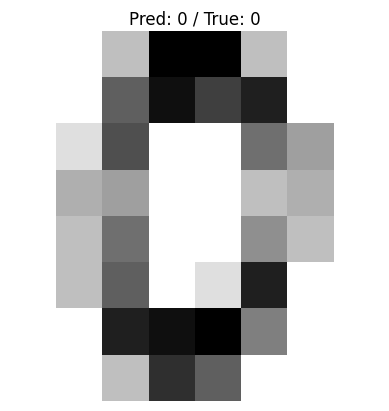

In [22]:
# 7) 예측 예시 및 시각화
idx = 10
pred = model.predict(X_test[idx:idx+1], verbose=0)
pred_label = int(np.argmax(pred, axis=1)[0])

plt.imshow(X_test[idx].squeeze(), cmap=plt.cm.gray_r, interpolation="nearest")
plt.title(f"Pred: {pred_label} / True: {int(y_test[idx])}")
plt.axis("off")
plt.show()